### CatsDogs_TF.ipynb

+ This notebook demos image classification using convolutional network models under Python/TF/Keras.

+ The API is TF/Kever 2.18

+ The data consists of the cats/dogs image data from Kaggle. The data is located  in two directories, FullSet and SmallSet.

```
    /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/
    /drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/

Both have the following structure.

    .../SmallSet/train/cat  /train/dog      # 1,000 images of cats and 1,000 of dogs
    ...SmallSet/test/cat   /test/dog        # 1,000 images of cats and 1,000 of dogs
    .../SmallSet/validation/cat  /validation/dog  # 500 images of cats and 500 dogs

    .../FullSet/train/cat  /train/dog       # 5,000 images of cats and 5,000 of dogs
    .../FullSet/test/cat   /test/dog        # 5,000 images of cats and 5,000 of dogs
    .../FullSet/validation/cat  /validation/dog  # 2490 images of cats and 2469 dogs
```


In [17]:
import os 
import tensorflow as tf
import matplotlib.pyplot as plt  # For visualization (optional)

In [18]:
# 1. Dataset Path and Parameters
data_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/"

data_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/"

image_height = 150  # Adjust as needed
image_width = 150  # Adjust as needed
batch_size = 32      # Adjust as needed
epochs = 20         # Adjust as needed

In [19]:
# 2. Get Class Names by Inspecting Directory (Essential)
class_names = sorted(os.listdir(data_dir))  # Get sorted list of subdirectories
num_classes = len(class_names) # Get number of classes
print("Class names:", class_names)

Class names: ['NewSavedModel', 'SavedHistory.npy', 'SavedModel', 'SavedModel.h5', 'plot1.png', 'plot2.png', 'test', 'train', 'validation']


In [20]:
# 2. Data Loading and Preprocessing using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/train",  # Path to training data
    labels='inferred',     # Infer labels from directory structure
    label_mode='binary',   # Use binary labels (0 for cat, 1 for dog)
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=True,          # Shuffle the training data
    validation_split=0.2,  # Create a validation set (optional)
    subset="training",      # Specify this is the training set
    seed=123               # For reproducibility (optional)
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [21]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/train",  # Same directory as training, but different subset
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False,         # No need to shuffle validation data
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [22]:
# 4.  Mapping Labels (if needed for display or other purposes)
# This is how we can map back to class names:
label_map = dict(zip(range(num_classes), class_names))

for images, labels in train_dataset.take(1):
    for i in range(len(images)):
        label_index = int(labels[i].numpy())
        class_name = label_map[label_index] # Get the class name
        print(f"Image {i+1}: {class_name}")


Image 1: SavedHistory.npy
Image 2: SavedHistory.npy
Image 3: SavedHistory.npy
Image 4: SavedHistory.npy
Image 5: SavedHistory.npy
Image 6: SavedHistory.npy
Image 7: SavedHistory.npy
Image 8: NewSavedModel
Image 9: SavedHistory.npy
Image 10: NewSavedModel
Image 11: NewSavedModel
Image 12: NewSavedModel
Image 13: NewSavedModel
Image 14: SavedHistory.npy
Image 15: NewSavedModel
Image 16: NewSavedModel
Image 17: SavedHistory.npy
Image 18: SavedHistory.npy
Image 19: NewSavedModel
Image 20: SavedHistory.npy
Image 21: NewSavedModel
Image 22: SavedHistory.npy
Image 23: NewSavedModel
Image 24: SavedHistory.npy
Image 25: NewSavedModel
Image 26: NewSavedModel
Image 27: SavedHistory.npy
Image 28: SavedHistory.npy
Image 29: NewSavedModel
Image 30: SavedHistory.npy
Image 31: NewSavedModel
Image 32: SavedHistory.npy


/tmp/ipykernel_18689/1999496799.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(labels[i].numpy())
2025-02-08 14:24:26.596960: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [23]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir + "/test",  # Path to test data
    labels='inferred',
    label_mode='binary',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    shuffle=False        # No need to shuffle test data
)

Found 2000 files belonging to 2 classes.


In [24]:

# 3. Data Augmentation (Optional but Highly Recommended)
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  # Add more augmentation layers as needed (e.g., zoom, shear)
])

In [25]:
# Example of applying augmentation:
for images, labels in train_dataset.take(1):  # Take one batch
    augmented_images = data_augmentation(images)
    # ... use augmented_images in training loop ...

In [26]:

# 4. Prefetching (Essential for Performance)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


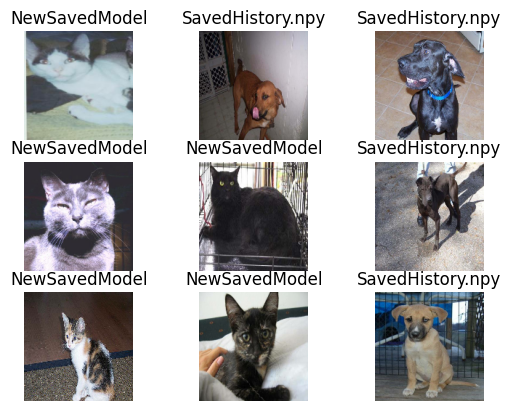

In [27]:

# 5. Display a few good images 

for images, labels in train_dataset.take(1):
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])]) # Convert to int for indexing
        plt.axis("off")
    plt.show()

In [28]:
# 2. Build CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)), # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (1 neuron for binary)
])

In [29]:

# 3. Model Compilation
model.compile(
    optimizer='adam',  # We can experiment with other optimizers
    loss='binary_crossentropy', # Let's use 'categorical_crossentropy' for > 2 classes
    metrics=['accuracy']
)

In [30]:

# 4. Model Training
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset
)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5336 - loss: 0.9925 - val_accuracy: 0.9900 - val_loss: 0.5187
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5988 - loss: 0.6719 - val_accuracy: 0.7175 - val_loss: 0.6132
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6914 - loss: 0.5984 - val_accuracy: 0.7850 - val_loss: 0.4325
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7439 - loss: 0.5177 - val_accuracy: 0.8600 - val_loss: 0.3790
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7712 - loss: 0.4782 - val_accuracy: 0.7925 - val_loss: 0.4175
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8278 - loss: 0.3657 - val_accuracy: 0.8275 - val_loss: 0.3563
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8603 - loss: 0.3126 - val_accuracy: 0.9225 - val_loss: 0.2134
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9126 - loss: 0.2032 - val_accuracy: 0.9350 - v

In [31]:

# 5. Evaluate Model 
# test_dataset = ...  # Load the test dataset

loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# 6. Plot Training History (Optional but very useful)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6936 - loss: 2.4562
Test Loss: 2.516702651977539
Test Accuracy: 0.6959999799728394


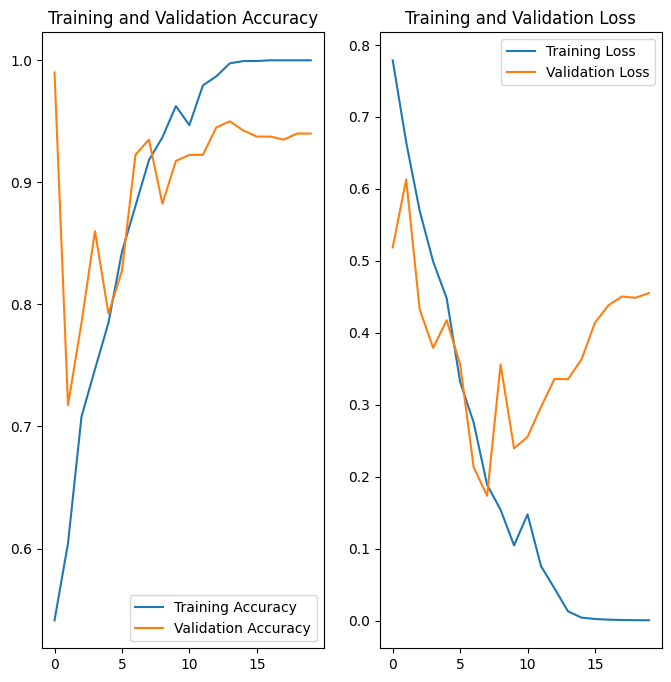

In [32]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

# 7. Save the model
# File is quite big (228 MB) 
model.save("/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/SmallSet/NewSavedModel/newmodel.keras")
